<a href="https://colab.research.google.com/github/wcolwellcol/FinTechCourseWork/blob/main/CribPredictv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Upload cleaned csvs to Colab
from google.colab import files

csv_file = files.upload()

Saving bos_housing_prices.csv to bos_housing_prices (3).csv
Saving chi_housing_prices.csv to chi_housing_prices (3).csv
Saving clean_interest_rates.csv to clean_interest_rates (2).csv
Saving hou_housing_prices.csv to hou_housing_prices (3).csv
Saving lax_housing_prices.csv to lax_housing_prices (3).csv
Saving MHI_clean.csv to MHI_clean (2).csv
Saving mia_housing_prices.csv to mia_housing_prices (3).csv
Saving nyc_housing_prices.csv to nyc_housing_prices (3).csv
Saving pho_housing_prices.csv to pho_housing_prices (3).csv
Saving sea_housing_prices.csv to sea_housing_prices (3).csv
Saving unemployment_cleaned.csv to unemployment_cleaned (2).csv
Saving vix_lumber_spy.csv to vix_lumber_spy (2).csv


In [3]:
#read cleaned csvs into dataframes
vix_lumber_spy_df = pd.read_csv('vix_lumber_spy.csv')
lax_df = pd.read_csv('lax_housing_prices.csv')
MHI_df = pd.read_csv('MHI_clean.csv')
mia_df = pd.read_csv('mia_housing_prices.csv')
nyc_df = pd.read_csv('nyc_housing_prices.csv')
pho_df = pd.read_csv('pho_housing_prices.csv')
sea_df = pd.read_csv('sea_housing_prices.csv')
unemployment_df = pd.read_csv('unemployment_cleaned.csv')
hou_df = pd.read_csv('hou_housing_prices.csv')
rates_df = pd.read_csv('clean_interest_rates.csv')
chi_df = pd.read_csv('chi_housing_prices.csv')
bos_df = pd.read_csv('bos_housing_prices.csv')

In [4]:
#rename DATE and index columns to Date
MHI_df = MHI_df.rename(columns={'DATE': 'Date'})
rates_df = rates_df.rename(columns={'DATE': 'Date'})
unemployment_df = unemployment_df.rename(columns={'DATE': 'Date'})
vix_lumber_spy_df = vix_lumber_spy_df.rename(columns={'index': 'Date'})

In [5]:
#specify the list of dataframes to be merged
dataframes = [vix_lumber_spy_df, lax_df, MHI_df, mia_df, nyc_df, pho_df, sea_df, unemployment_df, hou_df, rates_df, chi_df, bos_df]

#merge the dataframes using the 'outer' join method
cribpredict_df = dataframes[0]

#iterate over the remaining dataframes and merge them with the 'left'
for df in dataframes[1:]:
    cribpredict_df = pd.merge(cribpredict_df, df, on=['Date'], how='outer')

#display the merged dataframe
cribpredict_df.tail()


,Date,VIX,Lumber,SPY,Los Angeles,MIA_MHI,BOS_MHI,PHO_MHI,NY_MHI,SEA_MHI,...,NY_UR,SEA_UR,LA_UR,HOU_UR,CHI_UR,Houston,DFF,MORTGAGE30US,Chicago,Boston
398,1996-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.5,6.9,5.4,4.9,NaN,NaN,NaN,NaN,NaN
399,1996-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.3,6.9,5.0,4.7,NaN,NaN,NaN,NaN,NaN
400,1996-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.4,6.8,5.4,4.6,NaN,NaN,NaN,NaN,NaN
401,1996-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.1,6.7,5.2,4.9,NaN,NaN,NaN,NaN,NaN
402,1996-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3,4.6,6.7,5.9,5.7,NaN,NaN,NaN,NaN,NaN


In [6]:
#check data types
cribpredict_df.dtypes

Date             object
VIX             float64
Lumber          float64
SPY             float64
Los Angeles     float64
MIA_MHI         float64
BOS_MHI         float64
PHO_MHI         float64
NY_MHI          float64
SEA_MHI         float64
LA_MHI          float64
HOU_MHI         float64
CHI_MHI         float64
Miami           float64
New York        float64
Phoenix         float64
Seattle         float64
MIA_UR          float64
BOS_UR          float64
PHO_UR          float64
NY_UR           float64
SEA_UR          float64
LA_UR           float64
HOU_UR          float64
CHI_UR          float64
Houston         float64
DFF             float64
MORTGAGE30US    float64
Chicago         float64
Boston          float64
dtype: object

In [7]:
cribpredict_df['Date'] = pd.to_datetime(cribpredict_df['Date'])
cribpredict_df.set_index('Date', inplace=True)
cribpredict_df

,VIX,Lumber,SPY,Los Angeles,MIA_MHI,BOS_MHI,PHO_MHI,NY_MHI,SEA_MHI,LA_MHI,...,NY_UR,SEA_UR,LA_UR,HOU_UR,CHI_UR,Houston,DFF,MORTGAGE30US,Chicago,Boston
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-01,22.718261,333.900000,150.375000,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.1,3.8,5.1,4.1,4.2,NaN,5.853548,8.2400,NaN,NaN
2000-04-01,27.098500,311.249474,146.231911,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.3,4.1,5.1,4.4,4.2,NaN,6.019667,8.1525,NaN,NaN
2000-05-01,26.290435,291.777273,142.080250,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.2,4.3,5.0,4.7,4.7,NaN,6.268065,8.5150,NaN,NaN
2000-06-01,21.540000,288.352727,146.521318,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.6,4.4,5.0,4.6,4.6,NaN,6.528333,8.2880,NaN,NaN
2000-07-01,19.890000,258.655000,147.503905,NaN,33228.0,28914.0,33123.5,30888.25,39505.0,32297.5,...,4.5,4.4,4.9,4.6,4.3,NaN,6.544516,8.1475,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.5,6.9,5.4,4.9,NaN,NaN,NaN,NaN,NaN
1996-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,4.3,6.9,5.0,4.7,NaN,NaN,NaN,NaN,NaN
1996-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3,4.4,6.8,5.4,4.6,NaN,NaN,NaN,NaN,NaN


In [8]:
###WILL STUFF
cribpredict_df = cribpredict_df.copy().dropna()

In [9]:
#helper functions
def prep_df(df, name, abbreviation):
  cribpredict_df = df.copy().dropna()
  city_df = cribpredict_df[['VIX', 'Lumber', 'SPY',name,f'{abbreviation}_MHI','DFF','MORTGAGE30US',f'{abbreviation}_UR']]
  return city_df

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [10]:
HOU_df = prep_df(cribpredict_df, 'Houston', 'HOU')
CHI_df = prep_df(cribpredict_df, 'Chicago', 'CHI')
NYC_df = prep_df(cribpredict_df, 'New York', 'NY')
SEA_df = prep_df(cribpredict_df, 'Seattle', 'SEA')
MIA_df = prep_df(cribpredict_df, 'Miami', 'MIA')
PHO_df = prep_df(cribpredict_df, 'Phoenix', 'PHO')
BOS_df = prep_df(cribpredict_df, 'Boston', 'BOS')
LAX_df = prep_df(cribpredict_df, 'Los Angeles', 'LA')

In [11]:
cribpredict_df.columns

Index(['VIX', 'Lumber', 'SPY', 'Los Angeles', 'MIA_MHI', 'BOS_MHI', 'PHO_MHI',
       'NY_MHI', 'SEA_MHI', 'LA_MHI', 'HOU_MHI', 'CHI_MHI', 'Miami',
       'New York', 'Phoenix', 'Seattle', 'MIA_UR', 'BOS_UR', 'PHO_UR', 'NY_UR',
       'SEA_UR', 'LA_UR', 'HOU_UR', 'CHI_UR', 'Houston', 'DFF', 'MORTGAGE30US',
       'Chicago', 'Boston'],
      dtype='object')

In [12]:
df = BOS_df

In [13]:
df

,VIX,Lumber,SPY,Boston,BOS_MHI,DFF,MORTGAGE30US,BOS_UR
Date,,,,,,,,
2008-04-01,21.562727,224.794545,136.995455,322067.0,40641.0,2.278333,5.9175,4.6
2008-05-01,18.360000,247.995000,140.470476,333067.0,40641.0,1.978387,6.0360,5.0
2008-06-01,22.110476,245.786000,134.258095,344167.0,40641.0,2.001000,6.3200,5.1
2008-07-01,24.343043,251.966667,125.630909,351000.0,40641.0,2.009677,6.4260,5.0
2008-08-01,20.695714,259.345714,128.361429,353333.0,40641.0,1.996452,6.4775,5.2
...,...,...,...,...,...,...,...,...
2021-08-01,17.472727,510.672727,444.520000,593333.0,54164.0,0.092258,2.8425,4.3
2021-09-01,19.669545,608.527273,443.553810,575833.0,54164.0,0.079333,2.9000,3.9
2021-10-01,17.871429,688.247619,444.725238,562500.0,54164.0,0.079032,3.0675,3.4


In [14]:
n = len(df)
train_df = df[0:int(n*0.7)]
test_df = df[int(n*0.7):int(n)]

In [15]:
test_df

,VIX,Lumber,SPY,Boston,BOS_MHI,DFF,MORTGAGE30US,BOS_UR
Date,,,,,,,,
2017-11-01,10.510455,441.095238,259.268095,405000.0,53751.0,1.157000,3.9220,3.0
2017-12-01,10.247143,434.121000,266.167500,410000.0,53751.0,1.301613,3.9500,3.7
2018-01-01,11.022174,468.309524,278.304762,411000.0,49584.0,1.414516,4.0325,3.6
2018-02-01,22.314500,500.345263,270.236842,405667.0,49584.0,1.417500,4.3300,3.4
2018-03-01,19.066818,489.547619,269.981905,405667.0,49584.0,1.506129,4.4440,3.0
2018-04-01,18.267619,540.187619,264.862857,417667.0,49584.0,1.692333,4.4675,3.0
2018-05-01,14.085217,597.981818,270.070455,434667.0,49584.0,1.700000,4.5860,3.5
2018-06-01,13.678095,565.023810,275.193333,454667.0,49584.0,1.819667,4.5700,3.4
2018-07-01,13.283636,505.409524,278.872381,463333.0,49584.0,1.910000,4.5275,3.1


In [16]:
train_features = train_df.copy()
test_features = test_df.copy()

train_labels = train_features.pop('Boston')
test_labels = test_features.pop('Boston')

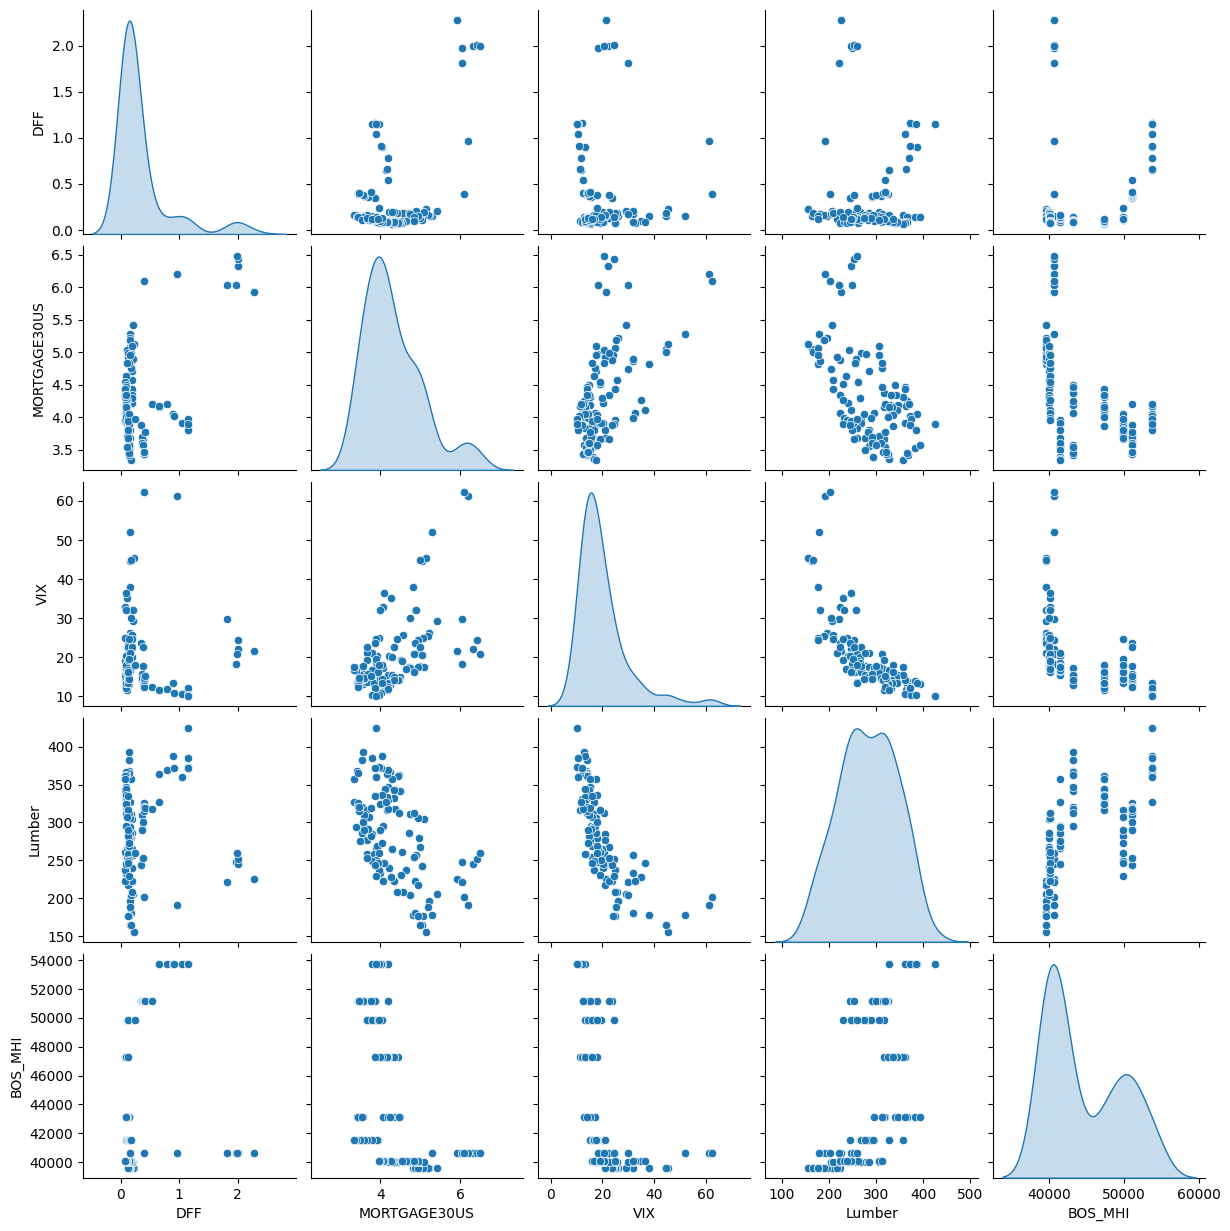

In [17]:
sns.pairplot(train_features[['DFF', 'MORTGAGE30US', 'VIX', 'Lumber','BOS_MHI']], diag_kind='kde')

In [18]:
#illustrate the need to normalize the data
train_df.describe().transpose()[['mean', 'std']]

,mean,std
VIX,20.073945,9.691371
Lumber,282.944120,60.723731
SPY,160.316326,47.238241
Boston,342503.452174,32912.728159
BOS_MHI,44656.513043,4997.384137
DFF,0.336838,0.472162
MORTGAGE30US,4.319565,0.725770
BOS_UR,5.566087,1.443976


In [19]:
#normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [20]:
#show outputs of normalizing
print(normalizer.mean.numpy())

[[2.0073942e+01 2.8294412e+02 1.6031633e+02 4.4656512e+04 3.3683836e-01
  4.3195648e+00 5.5660872e+00]]


In [21]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [22]:
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                15        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 23
Trainable params: 8
Non-trainable params: 15
_________________________________________________________________


In [23]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(7, 1) dtype=float32, numpy=
array([[-0.42355257],
       [-0.633203  ],
       [ 0.16390091],
       [ 0.04364973],
       [ 0.34943634],
       [-0.6377028 ],
       [ 0.37725717]], dtype=float32)>

In [24]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [25]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=500,
    # Suppress logging.
    verbose=0)
    # Calculate validation results on 20% of the training data.
    # validation_split = 0.2)

CPU times: user 3.96 s, sys: 154 ms, total: 4.12 s
Wall time: 3.72 s


In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,epoch
0,342503.40625,0
1,342502.90625,1
2,342502.53125,2
3,342502.12500,3
4,342501.75000,4
...,...,...
495,342305.31250,495
496,342304.90625,496
497,342304.53125,497
498,342304.12500,498


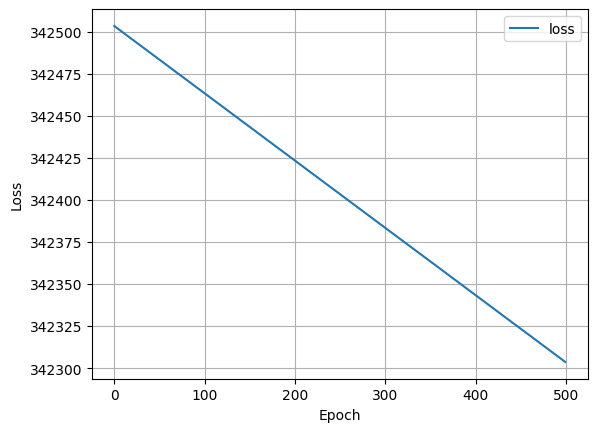

In [27]:
plot_loss(history)

In [28]:
linear_model.evaluate(
    test_features, test_labels, verbose=2)

2/2 - 0s - loss: 477015.9062 - 143ms/epoch - 71ms/step


477015.90625

In [29]:
test_results = {}

In [30]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [31]:
test_results

{'linear_model': 477015.90625}

In [32]:
linear_model_2 = tf.keras.Sequential()

In [33]:
number_input_features = 7
hidden_nodes_layer1 =  6
hidden_nodes_layer2 =  3

In [34]:
linear_model_2.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
linear_model_2.add(Dense(units=hidden_nodes_layer2, input_dim=number_input_features, activation="relu"))
linear_model_2.add(Dense(units=1, activation="relu"))

In [35]:
linear_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['mape'])

In [36]:
model = linear_model_2.fit(train_features,
    train_labels,
    verbose=0, epochs=25)

In [37]:
 model_loss, model_mape = linear_model_2.evaluate(test_features, test_labels, verbose=2)

2/2 - 0s - loss: 80461.1094 - mape: 16.1570 - 131ms/epoch - 66ms/step


2/2 [==============================] - 0s 6ms/step


<Figure size 2500x1000 with 0 Axes>

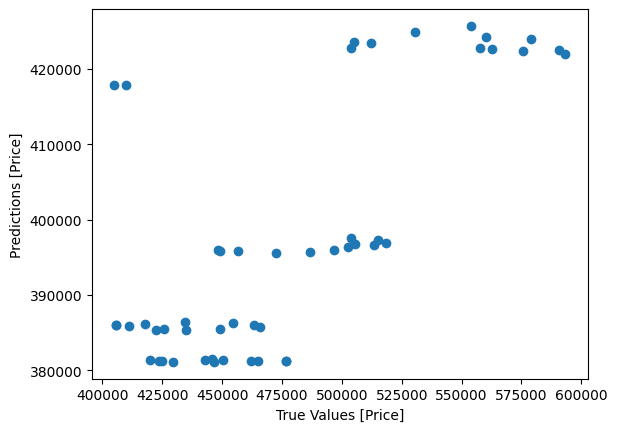

<Figure size 2500x1000 with 0 Axes>

In [38]:
test_predictions = linear_model_2.predict(test_features).flatten()
# train_predictions = linear_model_2.predict(train_features).flatten()

a = plt.axes(aspect='auto')
plt.scatter(test_labels, test_predictions)
# plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.figure(figsize= (25,10))
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

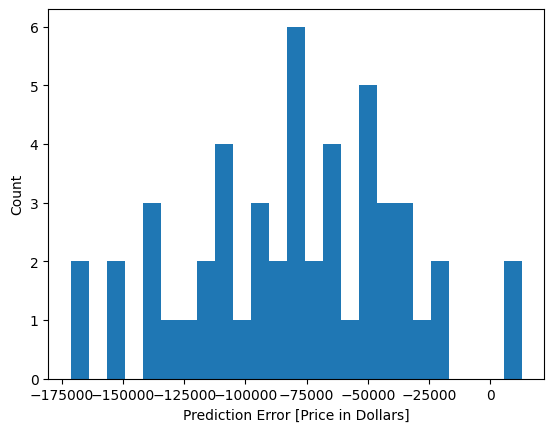

In [40]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Price in Dollars]')
_ = plt.ylabel('Count')
